# Jupyter notebook - Regression Tree

We do an exercise to estimate the med value of Boston Housee using Regression tree.

We use GridSearchCV to perform cross validation

In [ ]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [3]:
data = pd.read_csv('../Dataset/BostonHouse.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Data description:

1. crim: per capita rate by area
2. zn: proportion of residential land zoned for lots over 25,000 sq.ft.
3. indus: proportion of non-retail business acres per town.
4. chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. nox: nitrogen oxides concentration (parts per 10 million).
6. rm: average number of rooms per dwelling
7. age: proportion of owner-occupied units built prior to 1940.
8. dis: weighted mean of distances to five Boston employment centres. 
9. rad: index of accessibility to radial highways.
10. tax: full-value property-tax rate per 10,000 dollars.
11. ptratio: pupil-teacher ratio by town
12. b: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. lstat: lower status of the population (percent)
14. medv: median value of owner-occupied homes in 1000s dollars.


In [4]:
# Divide X and y
X = data.drop('medv', axis = 1)
y = data['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

# Regression tree

In [5]:
# we fix the max_depth = 2
reg_tree = DecisionTreeRegressor(max_depth = 2, random_state = 10)

In [6]:
reg_tree.fit(X_train, y_train)

# predict the model
pred_oos = reg_tree.predict(X_test)
pred_ins = reg_tree.predict(X_train)

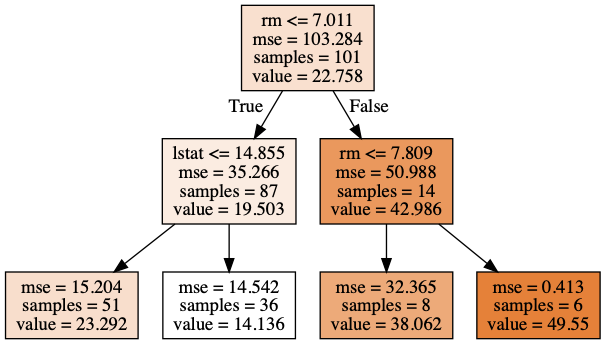

In [7]:
# Print the tree
graph, = print_tree(reg_tree, features = X.columns)
Image(graph.create_png())

In [8]:
# Evaluate the tree on the training set.
print("Training MSE: ", mean_squared_error(pred_ins, y_train))
# Evaluate the tree on the training set.
print("Test MSE: ", mean_squared_error(pred_oos, y_test))

Training MSE:  15.448848200996569
Test MSE:  33.808267674084284


In [9]:
# Increase the depth 
# we fix the max_depth = 2
reg_tree3 = DecisionTreeRegressor(max_depth = 3, random_state = 10)

In [10]:
reg_tree3.fit(X_train, y_train)

# predict the model
pred_oos3 = reg_tree3.predict(X_test)
pred_ins3 = reg_tree3.predict(X_train)

# Evaluate the tree on the training set.
print("Training MSE: ", mean_squared_error(pred_ins3, y_train))
# Evaluate the tree on the training set.
print("Test MSE: ", mean_squared_error(pred_oos3, y_test))

Training MSE:  7.909273889405531
Test MSE:  32.80400701978662


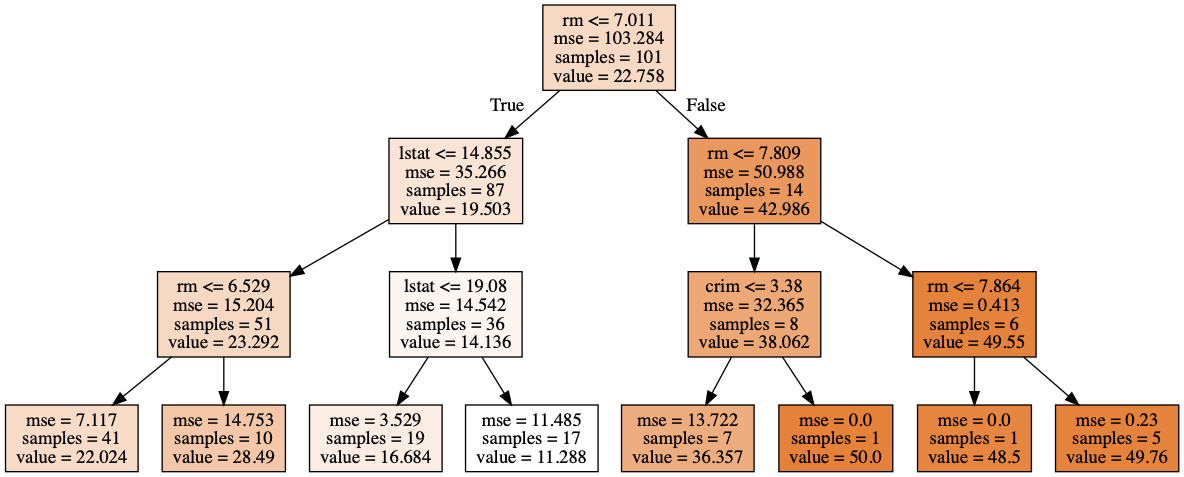

In [11]:
# Print the tree
graph, = print_tree(reg_tree3, features = X.columns)
Image(graph.create_png())

In [12]:
# Increase depth again
reg_tree4 = DecisionTreeRegressor(max_depth = 4, random_state = 10)

In [13]:
reg_tree4.fit(X_train, y_train)

# predict the model
pred_oos4 = reg_tree4.predict(X_test)
pred_ins4 = reg_tree4.predict(X_train)

# Evaluate the tree on the training set.
print("Training MSE: ", mean_squared_error(pred_ins4, y_train))
# Evaluate the tree on the training set.
print("Test MSE: ", mean_squared_error(pred_oos4, y_test))

Training MSE:  4.512558989357582
Test MSE:  31.98445185907972


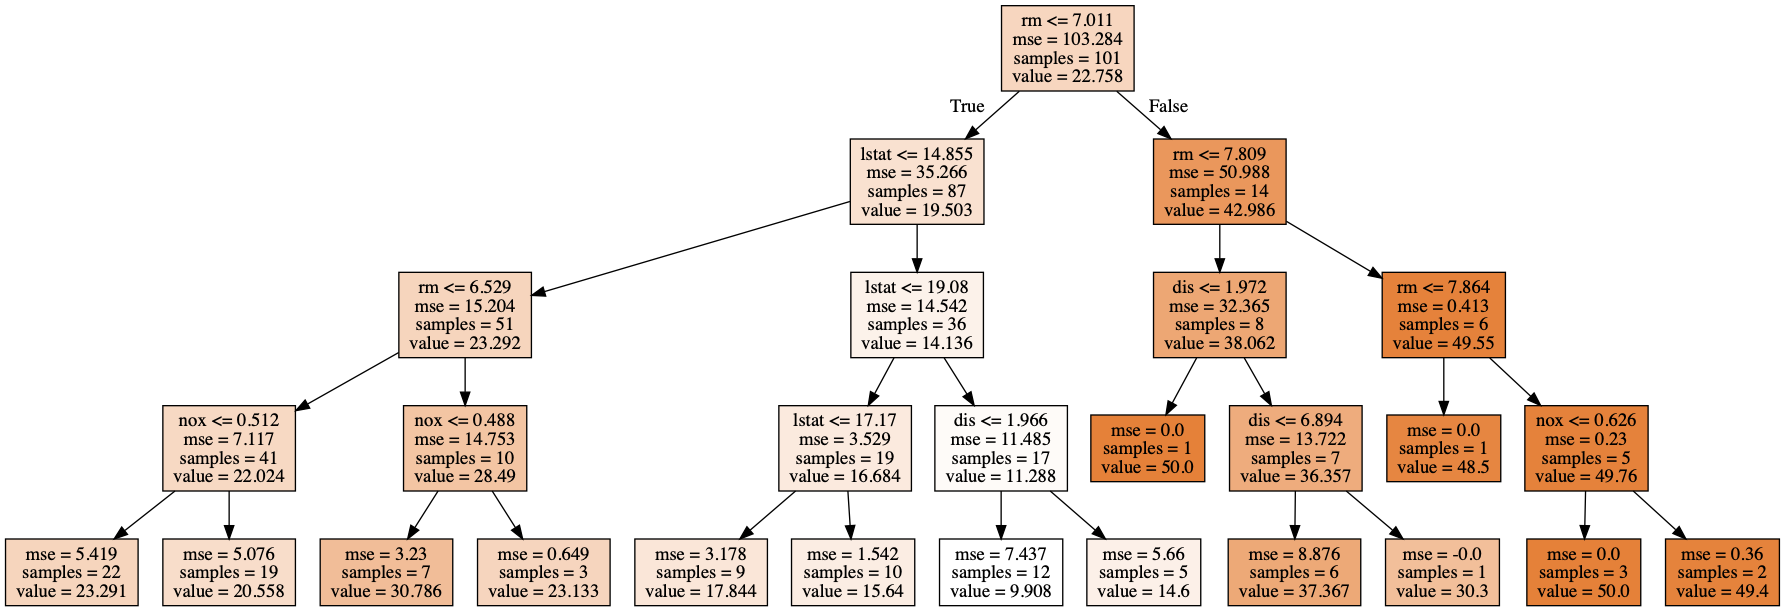

In [14]:
# Print the tree
graph, = print_tree(reg_tree4, features = X.columns)
Image(graph.create_png())

In [15]:
# Increase the depth 
# Increase depth again
reg_tree10 = DecisionTreeRegressor(max_depth = 10, random_state = 10)

In [16]:
reg_tree10.fit(X_train, y_train)

# predict the model
pred_oos10 = reg_tree10.predict(X_test)
pred_ins10 = reg_tree10.predict(X_train)

# Evaluate the tree on the training set.
print("Training MSE: ", mean_squared_error(pred_ins10, y_train))
# Evaluate the tree on the training set.
print("Test MSE: ", mean_squared_error(pred_oos10, y_test))

Training MSE:  0.00707920792079205
Test MSE:  36.49169135802469


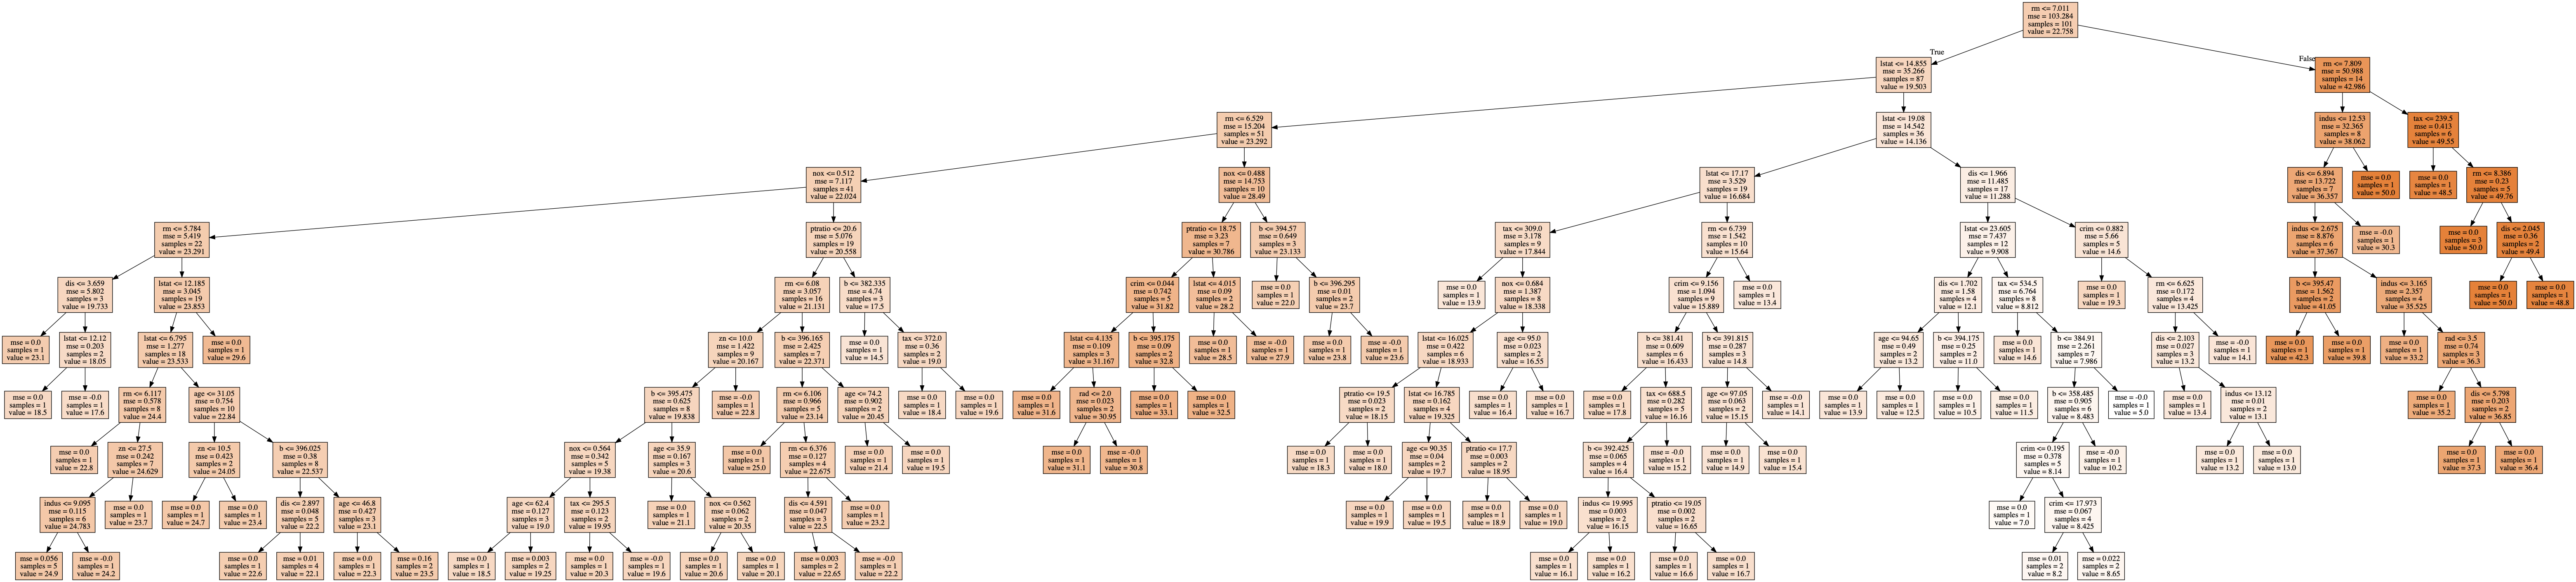

In [17]:
# Print the tree
graph, = print_tree(reg_tree10, features = X.columns)
Image(graph.create_png())

In [19]:
# let's eval the models
# Comparison
# Evaluate the tree on the training set.
print("Depth = 2: " "Training MSE = ", round(mean_squared_error(pred_ins, y_train),4), "-----",
      "Test MSE = ", round(mean_squared_error(pred_oos, y_test),4))
print("")
print("Depth = 3: " "Training MSE = ", round(mean_squared_error(pred_ins3, y_train),4), "-----",
      "Test MSE = ", round(mean_squared_error(pred_oos3, y_test),4))
print("")
print("Depth = 4: " "Training MSE = ", round(mean_squared_error(pred_ins4, y_train),4), "-----",
      "Test MSE = ", round(mean_squared_error(pred_oos4, y_test)),4)
print("")
print("Depth = 10: " "Training MSE = ", round(mean_squared_error(pred_ins10, y_train),4), "-----",
      "Test MSE = ", round(mean_squared_error(pred_oos10, y_test),4))

Depth = 2: Training MSE =  15.4488 ----- Test MSE =  33.8083

Depth = 3: Training MSE =  7.9093 ----- Test MSE =  32.804

Depth = 4: Training MSE =  4.5126 ----- Test MSE =  32.0 4

Depth = 10: Training MSE =  0.0071 ----- Test MSE =  36.4917


# Important features

In [20]:
# let's look at which are the most important variables
# 1. depth = 2
features_imp = reg_tree.feature_importances_
features_imp_df = pd.DataFrame(features_imp, index = X_train.columns, columns = ['Depth 2'])
features_imp_df

,Depth 2
crim,0.000000
zn,0.000000
indus,0.000000
chas,0.000000
nox,0.000000
rm,0.800575
age,0.000000
dis,0.000000
rad,0.000000
tax,0.000000


In [21]:
# now we concatenate the others
features_imp_df['Depth 3'] = reg_tree3.feature_importances_
features_imp_df['Depth 4'] = reg_tree4.feature_importances_
features_imp_df['Depth 10'] = reg_tree10.feature_importances_
features_imp_df

,Depth 2,Depth 3,Depth 4,Depth 10
crim,0.000000,0.016907,0.000000,0.003641
zn,0.000000,0.000000,0.000000,0.000925
indus,0.000000,0.000000,0.000000,0.020248
chas,0.000000,0.000000,0.000000,0.000000
nox,0.000000,0.000000,0.020004,0.020022
rm,0.800575,0.772314,0.745754,0.720508
age,0.000000,0.000000,0.000000,0.000806
dis,0.000000,0.000000,0.028404,0.013791
rad,0.000000,0.000000,0.000000,0.000178
tax,0.000000,0.000000,0.000000,0.005678


In [24]:
# how can we do prediction?

#pred = reg_tree.predict(np.array([np.random.randint(1,100,X.shape[1])]).reshape(1,-1))
#print('prediction: ', round(float(pred), 4))

In [25]:
# let's try to input correct values, only for the most importan features.
# we know that for a tree with depth = 2 the most important features are: rm and istat

# we input the mean of these categories
mean_rm = X['rm'].mean()
mean_lstat = X['lstat'].mean()

pred = reg_tree.predict(np.array([0,0,0,0,0,mean_rm,0,0,0,0,0,
                                          0, mean_lstat]).reshape(1,-1))
print('prediction: ', round(float(pred), 4))


prediction:  23.2922


# We can do cross validation using GridSearch

In [31]:
reg_tree = DecisionTreeRegressor(random_state = 10)
parameters = {'max_depth':range(1,15)}
clf = GridSearchCV(reg_tree, parameters, cv = 10, iid = True,
                  scoring = "neg_mean_squared_error")

In [32]:
# Fit the model with cross validation on the train set
clf.fit(X_train, y_train)
clf.best_score_

-25.98819666724655

In [33]:
# Tells us what is the best model to use form the insample cross val
clf.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=10, splitter='best')

In [34]:
pred = clf.predict(X_test)
print("Best model: ",  mean_squared_error(pred, y_test))


Best model:  32.80400701978662


In [35]:
# we can use a smaller range
reg_tree = DecisionTreeRegressor(random_state = 10)
parameters = {'max_depth':range(1,5)}
clf = GridSearchCV(reg_tree, parameters, cv = 10, iid = True,
                  scoring = "neg_mean_squared_error")
# Fit the model with cross validation on the train set
clf.fit(X_train, y_train)
print(clf.best_estimator_)
pred = clf.predict(X_test)
print("Max depth 3: ",  mean_squared_error(pred, y_test))

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=10, splitter='best')
Max depth 3:  32.80400701978662
